# 01PatientCOVID19V3

# Libraries

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from IPython.display import display

sns.set_palette("pastel")

# Loading Data

In [2]:
patient = pd.read_csv(
    "C:\py\Projects\TuringCollege\COVID19\DataSets\patient.csv",
    index_col=False,
    skipinitialspace=True,
)

# Display Data

In [3]:
pd.set_option("max_rows", None)

# Size

In [4]:
patient.shape

(5165, 14)

# Delete Unneeded Columns

In [5]:
patient = patient.drop(
    [
        "ID",
        "city",
        "infected_by",
        "contact_number",
        "symptom_onset_date",
        "released_date",
        "deceased_date",
        "state",
        "confirmed_date"
    ],
    axis=1,
)

# Rename Columns

In [6]:
patient.rename(
    columns={
        "sex": "Gender",
        "age": "Age",
        "infection_case": "Infection Reason",
        "country": "Country",
        "province": "Province",
        "city": "City",
    },
    inplace=True,
)
patient.head()

,Gender,Age,Country,Province,Infection Reason
0,male,50s,Korea,Seoul,overseas inflow
1,male,30s,Korea,Seoul,overseas inflow
2,male,50s,Korea,Seoul,contact with patient
3,male,20s,Korea,Seoul,overseas inflow
4,female,20s,Korea,Seoul,contact with patient


# Missing Data

In [7]:
patient.isna().sum()

Gender              1122
Age                 1380
Country                0
Province               0
Infection Reason     919
dtype: int64

In [8]:
patient.dropna(subset = ['Infection Reason'], how='any', inplace = True) 

In [9]:
patient.fillna(value = "MISSING", inplace = True)
patient.isna().sum()

Gender              0
Age                 0
Country             0
Province            0
Infection Reason    0
dtype: int64

In [10]:
patient['Infection Reason'] = patient['Infection Reason'].str.replace('etc', 'MISSING')

In [11]:
patient.head()

,Gender,Age,Country,Province,Infection Reason
0,male,50s,Korea,Seoul,overseas inflow
1,male,30s,Korea,Seoul,overseas inflow
2,male,50s,Korea,Seoul,contact with patient
3,male,20s,Korea,Seoul,overseas inflow
4,female,20s,Korea,Seoul,contact with patient


# Delete Unneeded Data

In [12]:
patient = patient[patient.Country != "China"]

In [13]:
patient = patient.drop(
    [
        "Country",
    ],
    axis=1,
)
patient.head()

,Gender,Age,Province,Infection Reason
0,male,50s,Seoul,overseas inflow
1,male,30s,Seoul,overseas inflow
2,male,50s,Seoul,contact with patient
3,male,20s,Seoul,overseas inflow
4,female,20s,Seoul,contact with patient


# Column Value Modifications 

In [14]:
patient.replace('overseas inflow', 'Overseas Inflow', inplace = True)
patient.replace('contact with patient', 'Contact with Patient', inplace = True)
patient.replace('male', 'Male', inplace = True)
patient.replace('female', 'Female', inplace = True)

# Column Order Modifications

In [15]:
patient = patient[
    ["Age", "Gender", "Province", "Infection Reason"]
]

,Age,Gender,Province,Infection Reason
0,50s,Male,Seoul,Overseas Inflow
1,30s,Male,Seoul,Overseas Inflow
2,50s,Male,Seoul,Contact with Patient
3,20s,Male,Seoul,Overseas Inflow
4,20s,Female,Seoul,Contact with Patient


# Infection Reasons

In [16]:
infection_reason = patient.groupby(['Infection Reason']).size().sort_values(ascending=False).to_frame().reset_index()
infection_reason=infection_reason.rename(columns={'Infection Reason':'Infection Reason', 0:'Confirmed'})
infection_reason=infection_reason.loc[infection_reason['Confirmed'] > 200]
infection_reason

,Infection Reason,Confirmed
0,Contact with Patient,1607
1,Overseas Inflow,834
2,MISSING,703


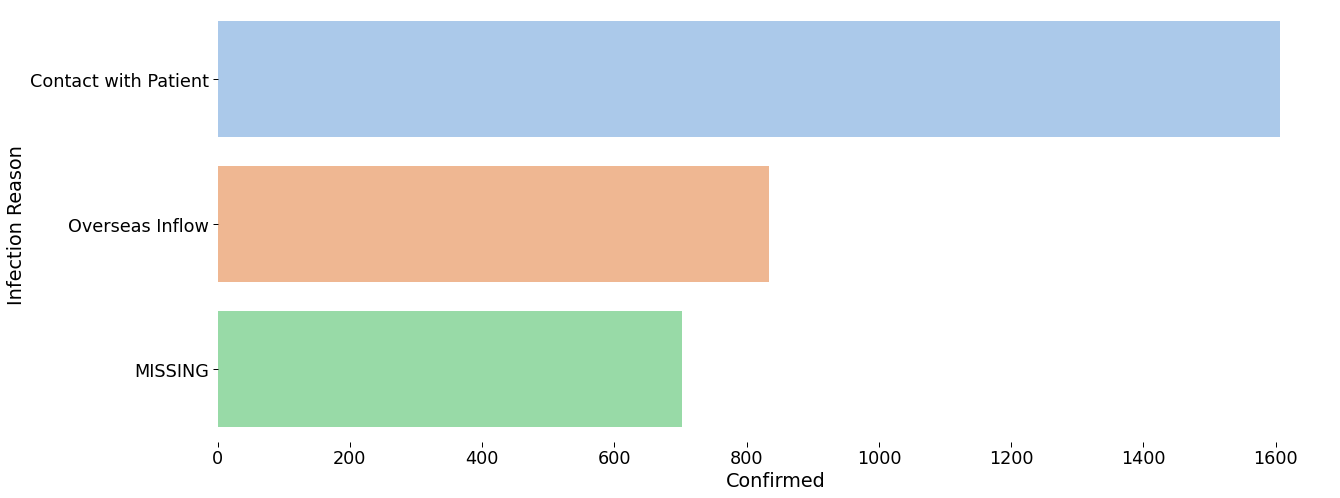

In [17]:
plt.figure(figsize=(20, 8))
sns.set_context("paper", font_scale=2.0)

sns.barplot(y="Infection Reason", x = 'Confirmed', data=infection_reason)
sns.despine(left=True, bottom=True)